<a href="https://colab.research.google.com/github/PranoveAB/SentimentAnalysis/blob/master/FinalBERTSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 120kB/s 
     |████████████████████████████████| 6.8MB 33.6MB/s 
     |████████████████████████████████| 983kB 48.6MB/s 
     |████████████████████████████████| 266kB 50.5MB/s 
     |████████████████████████████████| 1.9MB 41.3MB/s 
     |████████████████████████████████| 1.2MB 52.5MB/s 
     |████████████████████████████████| 471kB 46.0MB/s 
     |████████████████████████████████| 3.3MB 40.4MB/s 
     |████████████████████████████████| 901kB 48.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.3-cp37-none-any.whl size=25282380 sha256=7363ec7ae9e3ce0322e23ce8245c9f0a7fdd7cc151f8eb77351313938132de11
  Stored in directory: /root/.cache/pip/wheels/16/05/be/d6e659b3349016b1059e19fa028f165af4eeae2c196f329112
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=bd108cf5ecd8470e68371458540ab30cb8d8ac0a330cc6d82627004662c453e2
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [ ]:
import pandas as pd
import io
import re
dataset_url = 'https://raw.githubusercontent.com/PranoveAB/SentimentAnalysis/master/csv/2020tweets100k.csv?token=AK772SVIEZXR2J6KWRNTMQTAXUB2U'
df = pd.read_csv(dataset_url)

In [ ]:
df

,tweets
0,As if Great Depression-size job losses and con...
1,NEWS: U.S. UNEMPLOYMENT IS WORST SINCE DEPRESS...
2,"@smc429 The maneuvers, lies, firings , impeac..."
3,"@realDonaldTrump yeah, an economy in a depress..."
4,#COVID19 When was it wrong for safety precauti...
...,...
13724,CORONACRASH: This is the New 9/11 That Will Be...
13725,Postpartum anxiety/depression was all fun and ...
13726,@SteveW_Leave_EU @DVaugha49207961 If this fear...
13727,Its normal to feel #anxiety about the #coronav...


In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?://\S+', '', text) # Removing hyperlink
  text = re.sub('http?://\S+', '', text)
 
  return text

In [ ]:
df['tweets'] = df['tweets'].apply(cleanTxt)
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df['tweets'] = df['tweets'].str.lower()
df['tweets'] = df['tweets'].str.replace('\n', '')
df['tweets'] = df['tweets'].str.replace('\t', ' ')
df['tweets'] = df['tweets'].str.replace(':', ' ')
df['tweets'] = df['tweets'].str.replace('[#,@,&,$,%,^,(,),/,_,-]',' ')
df['tweets'] = df['tweets'].str.replace(' {2,}', ' ', regex=True)
df['tweets'] = df['tweets'].str.strip()


In [ ]:
df

,tweets
0,as if great depression size job losses and con...
1,news u.s. unemployment is worst since depressi...
2,429 the maneuvers lies firings impeachment and...
3,yeah an economy in a depression and death is a...
4,covid19 when was it wrong for safety precautio...
...,...
13724,coronacrash this is the new 9 11 that will be ...
13725,postpartum anxiety depression was all fun and ...
13726,leave eu 49207961 if this fear frenzy created ...
13727,its normal to feel anxiety about the coronavir...


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)


In [ ]:
df

,tweets,Subjectivity,Polarity
0,as if great depression size job losses and con...,0.451136,0.234091
1,news u.s. unemployment is worst since depressi...,0.275000,-0.250000
2,429 the maneuvers lies firings impeachment and...,0.450000,0.050000
3,yeah an economy in a depression and death is a...,0.425000,0.400000
4,covid19 when was it wrong for safety precautio...,0.383333,0.016667
...,...,...,...
13724,coronacrash this is the new 9 11 that will be ...,0.701136,0.159091
13725,postpartum anxiety depression was all fun and ...,0.200000,0.250000
13726,leave eu 49207961 if this fear frenzy created ...,0.250000,0.250000
13727,its normal to feel anxiety about the coronavir...,0.650000,0.187500


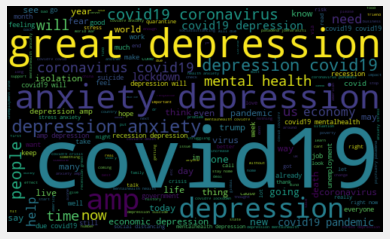

In [ ]:
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,tweets,Subjectivity,Polarity,Analysis
0,as if great depression size job losses and con...,0.451136,0.234091,Positive
1,news u.s. unemployment is worst since depressi...,0.275000,-0.250000,Negative
2,429 the maneuvers lies firings impeachment and...,0.450000,0.050000,Positive
3,yeah an economy in a depression and death is a...,0.425000,0.400000,Positive
4,covid19 when was it wrong for safety precautio...,0.383333,0.016667,Positive
...,...,...,...,...
13724,coronacrash this is the new 9 11 that will be ...,0.701136,0.159091,Positive
13725,postpartum anxiety depression was all fun and ...,0.200000,0.250000,Positive
13726,leave eu 49207961 if this fear frenzy created ...,0.250000,0.250000,Positive
13727,its normal to feel anxiety about the coronavir...,0.650000,0.187500,Positive


In [ ]:
df2  = df


In [ ]:

# Show the value counts
df2['Analysis'].value_counts()

Positive    7860
Negative    3431
Neutral     2438
Name: Analysis, dtype: int64

In [ ]:
df2.drop(df2[df2['Analysis'] == 'Neutral'].index, inplace = True)

In [ ]:
from sklearn.utils import shuffle
df2 = shuffle(df2)
df2

,tweets,Subjectivity,Polarity,Analysis
11721,entrepreneurs the elderly children single pare...,0.482857,0.192381,Positive
5293,will you also be doing these character highlig...,0.083333,0.066667,Positive
2846,covid19 apart. the state of being exiled from ...,0.651111,0.008889,Positive
4345,we are still providing free confidential and h...,0.613333,0.353333,Positive
3703,experts predict covid19 will lead to the worst...,0.513889,-0.116667,Negative
...,...,...,...,...
9388,webinar 4 2 will the market come roaring back ...,0.300000,-0.050000,Negative
7169,seems like all leaders learned from the great ...,0.750000,0.800000,Positive
9291,"""depression likes to stay depressed"" i learned...",0.333333,0.250000,Positive
2011,"boasted today he has done a ""spectacular job"" ...",0.883333,0.158333,Positive


In [ ]:
df2.drop(['Subjectivity'], axis=1, inplace=True)
df2.drop(['Polarity'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweets,Analysis
11721,entrepreneurs the elderly children single pare...,Positive
5293,will you also be doing these character highlig...,Positive
2846,covid19 apart. the state of being exiled from ...,Positive
4345,we are still providing free confidential and h...,Positive
3703,experts predict covid19 will lead to the worst...,Negative
...,...,...
9388,webinar 4 2 will the market come roaring back ...,Negative
7169,seems like all leaders learned from the great ...,Positive
9291,"""depression likes to stay depressed"" i learned...",Positive
2011,"boasted today he has done a ""spectacular job"" ...",Positive


In [ ]:
df_train = df2[:6000]

In [ ]:
df_test = df2[6000:]

In [ ]:
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')

In [ ]:
train_data_url = "https://raw.githubusercontent.com/PranoveAB/SentimentAnalysis/master/csv/train.csv?token=AK772SW2LRCM5DCZVOBV5ZTAXSVVU"
train_data = pd.read_csv(train_data_url)

In [ ]:
test_data_url = "https://raw.githubusercontent.com/PranoveAB/SentimentAnalysis/master/csv/test.csv?token=AK772SQ4YVYBMZRW3JK4L7DAXSVVO"
test_data = pd.read_csv(test_data_url)

In [ ]:
df_train.reset_index(inplace = True, drop = True)
df_test.reset_index(inplace = True, drop = True)

In [ ]:
df_train

,tweets,Analysis
0,entrepreneurs the elderly children single pare...,Positive
1,will you also be doing these character highlig...,Positive
2,covid19 apart. the state of being exiled from ...,Positive
3,we are still providing free confidential and h...,Positive
4,experts predict covid19 will lead to the worst...,Negative
...,...,...
5995,covid 19 pandemic and grief notinthisalone cov...,Negative
5996,and maybe just maybe they also thought it was ...,Positive
5997,sanity must prevail.. headed for depression an...,Positive
5998,quarantine mindset get the right shit done tod...,Positive


In [ ]:
df_train['Analysis'].value_counts()

Positive    4157
Negative    1843
Name: Analysis, dtype: int64

In [ ]:
df_test['Analysis'].value_counts()

Positive    3703
Negative    1588
Name: Analysis, dtype: int64

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = df_train,
                   text_column ='tweets',
                   label_columns ='Analysis',
                   val_df = df_test,
                   maxlen = 400,
                   preprocess_mode = 'bert')

['Negative', 'Positive']
   Negative  Positive
0       0.0       1.0
1       0.0       1.0
2       0.0       1.0
3       0.0       1.0
4       1.0       0.0
['Negative', 'Positive']
   Negative  Positive
0       1.0       0.0
1       0.0       1.0
2       1.0       0.0
3       0.0       1.0
4       0.0       1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(6000, 400)

In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preprocess
                             )

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = (X_train, y_train),
                             val_data = (X_test, y_test),
                            batch_size = 4)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1500/1500 [==============================] - 1101s 723ms/step - loss: 0.5370 - accuracy: 0.7317 - val_loss: 0.3553 - val_accuracy: 0.8390
Epoch 2/4
1500/1500 [==============================] - 1082s 721ms/step - loss: 0.2865 - accuracy: 0.8747 - val_loss: 0.2650 - val_accuracy: 0.8811
Epoch 3/4
1500/1500 [==============================] - 1085s 723ms/step - loss: 0.1168 - accuracy: 0.9553 - val_loss: 0.3018 - val_accuracy: 0.8989
Epoch 4/4
1500/1500 [==============================] - 1093s 729ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.4053 - val_accuracy: 0.9017


In [ ]:
learner

In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
data = ['NEWS: U.S. UNEMPLOYMENT IS WORST SINCE DEPRESSION via @nytimes   This #Unemployment impacted by #COVID19 is potentially starting the next biggest Recession or the next #GreatDepression.']

In [ ]:
data1 = ['I am very happy today' ]

In [ ]:
predictor.predict(data)

['Negative']

In [ ]:
predictor.predict(data1)

['Positive']

In [ ]:
data2 = ['I hate engineering. its a pure waste of time']
predictor.predict(data2)

['Negative']

In [ ]:
data3 = ['Hi, I am lucifer']
#predictor.predict(data3)
predictor.predict_proba(data1)

array([[3.549354e-05, 9.999645e-01]], dtype=float32)

In [ ]:
predictor.save('/content/bert')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import pickle

In [ ]:
predictor.export_model_to_tflite('/content/model.tflite',verbose=1)

converting to TFLite format ... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
INFO:absl:Using new converter: If you encounter a problem please file a bug. You can opt-out by setting experimental_new_converter=False


done.


'/content/model.tflite'